# **K-Means Clustering Implementation**  
  
**Author:** Srikar Kalle  
**Student ID:** C00313529  

---
# **Change Log**  
---

## **v1.1**  
✅ **Replaced Synthetic Data with Real-World Dataset**:  
- Previous implementation used `make_blobs` and `make_moons` for synthetic clustering.  
- Updated to use the **Penguins dataset** from Seaborn, ensuring a real-world use case.  

✅ **Data Preprocessing and Feature Scaling**:  
- Selected only **numerical features** (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g`).  
- Applied **StandardScaler()** to normalize the dataset for better clustering performance.  

✅ **Automated `k` Selection Using the Elbow Method**:  
- **Replaced fixed cluster numbers (`n_clusters=4, 6, 10`)** with an optimal `k` determined using **WCSS (Within-Cluster Sum of Squares)**.  
- Plotted the **Elbow Curve** to find the best `k` value dynamically.  

✅ **Added Silhouette Score for Model Evaluation**:  
- Previous version lacked proper **clustering evaluation metrics**.  
- Added **Silhouette Score** to assess cluster cohesion and separation.  

✅ **Replaced Visualization Approach**:  
- Removed **basic scatter plots of K-Means clustering boundaries**.  
- Implemented **enhanced visualization**:  
  - Data points plotted with cluster assignments.  
  - **Centroids highlighted** with red `X` markers for better clarity.  

✅ **Implemented Logging for Better Workflow Tracking**:  
- Added structured logging using Python’s **`logging` module**.  
- Logs include dataset loading, scaling, model training, and final evaluation.  
- Improves **debugging, monitoring, and reproducibility** of clustering steps.  

---

## **v1.0**  
- Used synthetic datasets (`make_blobs`, `make_moons`, `digits`).  
- Fixed `n_clusters` without evaluating optimal `k`.  
- No **feature scaling** or **evaluation metrics** were used.  
- Visualizations were simple scatter plots without **centroid highlighting**.  
- No **structured logging** for workflow tracking.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [3]:
# Step 1: Business Understanding
logging.info("Business Understanding: Applying K-Means Clustering to identify data patterns.")

2025-02-19 12:20:29,476 - INFO - Business Understanding: Applying K-Means Clustering to identify data patterns.


In [5]:
# Step 2: Data Understanding
logging.info("Loading dataset...")
data = sns.load_dataset('penguins').dropna()
logging.info(f"Dataset loaded with shape {data.shape}")

2025-02-19 12:21:14,277 - INFO - Loading dataset...
2025-02-19 12:21:15,766 - INFO - Dataset loaded with shape (333, 7)


In [6]:
# Selecting numerical features
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logging.info("Data scaled successfully.")

2025-02-19 12:21:53,959 - INFO - Data scaled successfully.


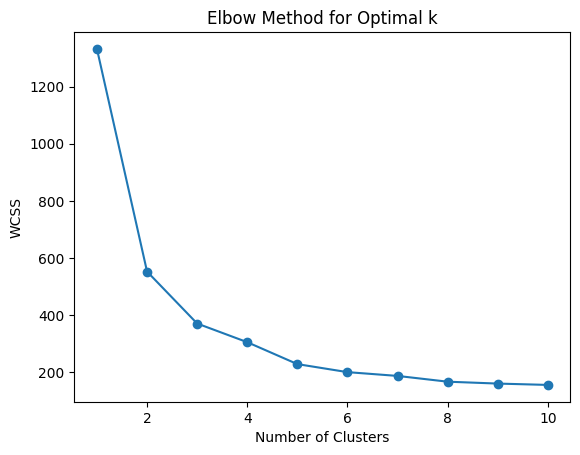

In [7]:
# Step 3: Finding Optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
# Step 4: Training K-Means Model
optimal_k = 3  # Chosen based on Elbow Method
logging.info(f"Optimal number of clusters selected: {optimal_k}")
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Step 5: Evaluation
sil_score = silhouette_score(X_scaled, labels)
logging.info(f"Silhouette Score: {sil_score:.4f}")

2025-02-19 12:23:26,376 - INFO - Optimal number of clusters selected: 3
2025-02-19 12:23:26,415 - INFO - Silhouette Score: 0.4462


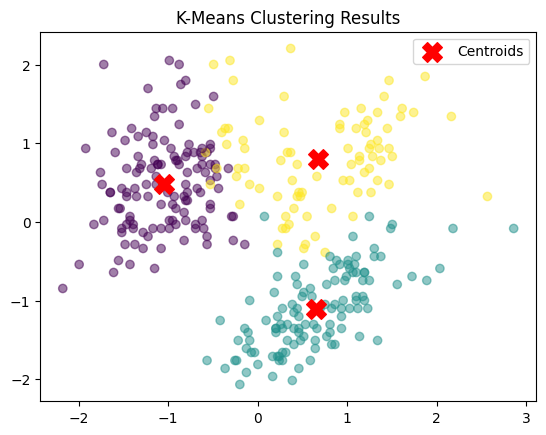

2025-02-19 12:24:07,402 - INFO - K-Means clustering completed successfully.


In [9]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()

logging.info("K-Means clustering completed successfully.")